In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('../../')


# Import LogoMaker
import logomaker


%matplotlib inline
plt.ion()

In [2]:
# Load counts matrix from fasta file
counts_mat = logomaker.load_alignment('../data/crp_sites.fasta')
counts_mat.to_csv('../data/crp_counts.txt', sep='\t', float_format='%d')

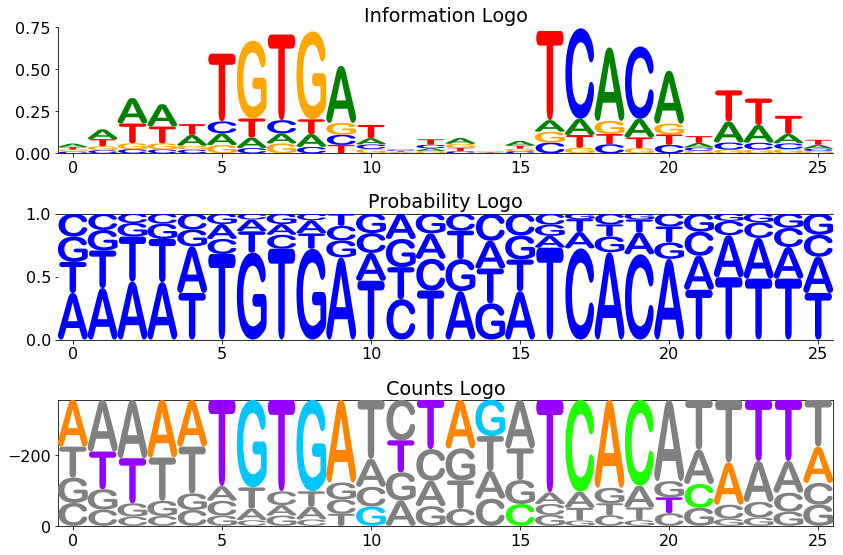

In [63]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = .5
mpl.rcParams['font.size'] = 16
#mpl.rcParams['axes.labelsize'] = 20


# Make information logo
logo1 = logomaker.make_logo(dataframe=counts_mat, 
                       matrix_type='information',  
                       draw_now=False,     
                       ylim=[0,0.75])


# Make frequency logo
logo2 = logomaker.make_logo(dataframe=counts_mat, 
                       matrix_type='probability', 
                       character_style_dict={'character_colors':'blue'},
                       axes_type='rails', 
                       stack_order='small_on_top',
                       draw_now=False
                        )

highlight_style_param_dict = {
                              'highlight_sequence':'ATTAATGTGAGTTAGCTCACTCATTA',   
                              'highlight_colors':'gist_rainbow'
                               }

# Make energy logo
logo3 = logomaker.make_logo(dataframe=counts_mat, 
                       matrix_type='counts', 
                       negate_matrix=True, 
                       axes_type='everything',
                       character_style_dict = {'character_colors':'gray'}, 
                       highlight_style_dict = highlight_style_param_dict,
                       draw_now=False,
                       )


# Draw logos
fig, ax_list = plt.subplots(3, figsize=[12,8])
ax_list[0].set_title('Information Logo')
logo1.draw(ax_list[0])
ax_list[1].set_title('Probability Logo')
logo2.draw(ax_list[1])
ax_list[2].set_title('Counts Logo')
logo3.draw(ax_list[2])

fig.savefig('../output/Figure1.pdf')